# Assignment4 (Homework6)

Due: **Apr. 11 23:59**

# Your information
------
*Name*: 俞嘉力 <br>
*Student ID*: 515260910007 <br>
*Assignment NO.*: hw4<br>

# The librarys you need

1. In assignment III, in principle only the following libraries are allowed: 
    * numpy
    * pandas
    * matplotlib 
    * scipy
    * re
    * pyqt
    * tk
    * os
    * sys
    * collections.defaultdict
    * flex/bison related libraries
    * copy

# Requirement

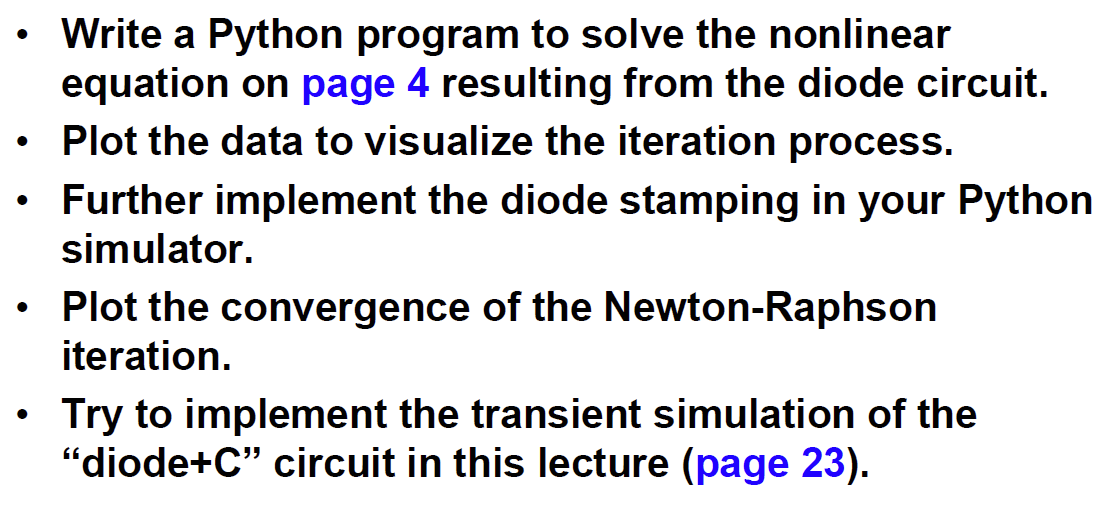

# Your Idea
------
**Describe your ideas here, how to implement this assignment, including the construction of test cases. This paragraph is included in the score. Also, it is best to have a flowchart.**



___
**Your flowchart here**
==================
![avatar](./pic/edaHW4.jpg)


# Your code & result

------
*We encourage object-oriented programming (plus points), calling your code here.
<br>You should not place all the code in jupyter, just execute the interface you wrap.*
<br>
**You are supposed to make sure that your source code and output are readable.<br> Comments in the code are required.**

In [1]:
# *Your code here
# *Example code
# *Note that even if you tend to provide a nice GUI, the following code is also required.

from mySolver import solver
netlist1 = '''
*netlist example 1
I1 0 1 1
R2 0 1 1
R3 1 2 0.5
D2 2 0 DMODEL
.print TRAN V(2, 0)
.end
'''
# netlist shown in page 4
#solver.solve(netlist1) # print the solution
#solver.showIteration() # visualize the iteration process

#solver.printMNAwithDiode(netlist1) # show MNA and prove your correctness

#solver.showNewtonRaphson() #plot covergence of the Newton-Raphson iteration

netlist2 = '''
*netlist example 1
I1 0 1 1
R2 0 1 1
R3 1 2 2
D2 2 0 DMODEL
C4 2 0 5
.print TRAN V(2, 0) V(1,0)
.end
''' #netlist shown in page23
#solver.solve(netlist2) # try to implement the transient simulation
#solver.plot() # plot the result







commandParams {'type': 'DC', 'src1': 'V1', 'start1': 0.0, 'stop1': -1.0, 'incr1': -0.01}
[{'deviceType': 'V', 'name': 'V2', 'connectionPoints': (1, 0), 'DC': -0.7}, {'deviceType': 'V', 'name': 'V1', 'connectionPoints': (2, 0), 'DC': 0.4}, {'deviceType': 'M', 'name': 'M1', 'connectionPoints': (2, 1, 0, 0), 'MNAME': 'PMOS'}]
{'type': 'PLOT', 'prtype': 'DC', 'ovs': [{'ovtype': 'I', 'ovnodes': ('V1', '0')}]}
{'type': 'DC', 'src1': 'V1', 'start1': 0.0, 'stop1': -1.0, 'incr1': -0.01, 'src2': 'V2', 'start2': 0.0, 'stop2': -1.0, 'incr2': -0.1}
{'src2': 'V2', 'val2': 0.0}
src2 V2 0.0
{'src2': 'V2', 'val2': -0.1}
src2 V2 -0.1
{'src2': 'V2', 'val2': -0.2}
src2 V2 -0.2
{'src2': 'V2', 'val2': -0.30000000000000004}
src2 V2 -0.30000000000000004
{'src2': 'V2', 'val2': -0.4}
src2 V2 -0.4
{'src2': 'V2', 'val2': -0.5}
src2 V2 -0.5
{'src2': 'V2', 'val2': -0.6000000000000001}
src2 V2 -0.6000000000000001
{'src2': 'V2', 'val2': -0.7000000000000001}
src2 V2 -0.7000000000000001
{'src2': 'V2', 'val2': -0.8}
src

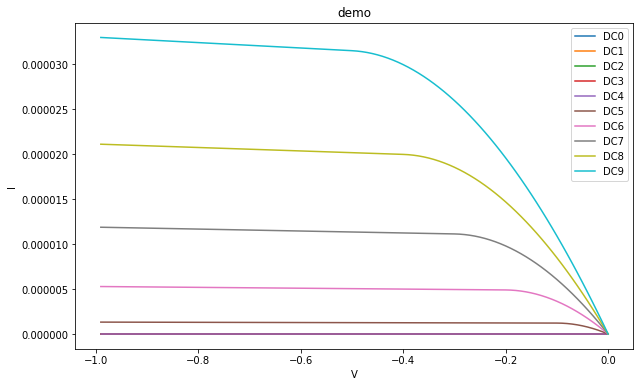

In [2]:
# simulate the mosfet
# PMOS DCT:
netlist = """
*netlist example 1
*netlist example 1
V2 1 0 -0.7
V1 2 0 0.4
M1 2 1 0 0 PMOS

.plot DC I(V1)
.DC V1 0 -1 -0.01 V2 0 -1 -0.1
.end
"""

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, -1, -0.01)

commandParams {'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.5, 'incr1': 0.01}
[{'deviceType': 'M', 'name': 'M1', 'connectionPoints': (1, 2, 0, 0), 'MNAME': 'NMOS'}, {'deviceType': 'V', 'name': 'V2', 'connectionPoints': (1, 0), 'DC': 1.0}, {'deviceType': 'V', 'name': 'V1', 'connectionPoints': (2, 0), 'DC': 1.5}]
{'type': 'PLOT', 'prtype': 'DC', 'ovs': [{'ovtype': 'I', 'ovnodes': ('V2', '0')}]}
{'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.5, 'incr1': 0.01, 'src2': 'V1', 'start2': 0.0, 'stop2': 1.5, 'incr2': 0.1}
{'type': 'END'}
{'V2': 3, 'V1': 4}
{'0': 0, '1': 1, '2': 2}


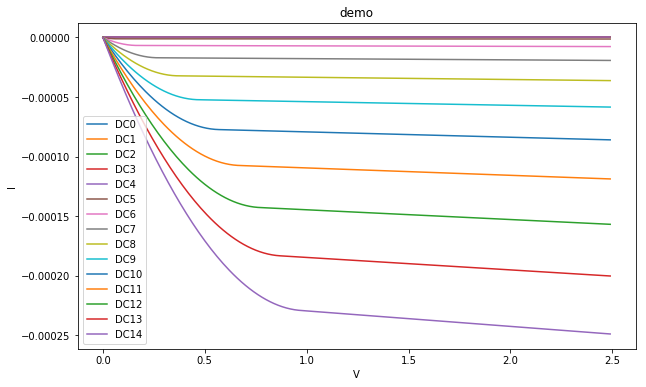

In [3]:
# simulate the mosfet
# NMOS DCT:
netlist = """
*netlist example 1
M1 1 2 0 0 NMOS
V2 1 0 1
V1 2 0 1.5

.plot DC I(V2)
.DC V2 0 2.5 0.01 V1 0 1.5 0.1
* vds vgs
.end
"""

from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, 2.5, 0.01)

In [1]:
# inveter VTC
netlist = """
*netlist example 1
V1 1 0 2.0
V2 2 0 1
M1 3 2 1 1 PMOS
M2 3 2 0 0 NMOS 

.plot DC V(3)
.DC V2 0 2 0.01 
.end
"""
from Spice import Spice 
mySpice = Spice()
mySpice.parse(netlist)
mySpice.plotDCWithMatplotlib(0, 2, 0.01)

commandParams {'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.0, 'incr1': 0.01}
[{'deviceType': 'V', 'name': 'V1', 'connectionPoints': (1, 0), 'DC': 2.0}, {'deviceType': 'V', 'name': 'V2', 'connectionPoints': (2, 0), 'DC': 1.0}, {'deviceType': 'M', 'name': 'M1', 'connectionPoints': (3, 2, 1, 1), 'MNAME': 'PMOS'}, {'deviceType': 'M', 'name': 'M2', 'connectionPoints': (3, 2, 0, 0), 'MNAME': 'NMOS'}]
{'type': 'PLOT', 'prtype': 'DC', 'ovs': [{'ovtype': 'V', 'ovnodes': ('3', '0')}]}
{'type': 'DC', 'src1': 'V2', 'start1': 0.0, 'stop1': 2.0, 'incr1': 0.01}
x_ [0. 2. 0. 0. 0. 0.]
wrong
x_ [ 0.00000000e+000  2.00000000e+000  1.00000000e-002 -1.28581033e+302
  0.00000000e+000  0.00000000e+000]
x_ [0.   2.   0.02  nan  nan  nan]


UnboundLocalError: local variable 'gds' referenced before assignment

___
# Grading Policy

1. The plagiarized code is 0 points, including the plagiarized.
2. Document and flow chart score.
3. Code quality and scalability score.
4. The code, unable to reproduce the code in my environment, will lead to zero points.
5. Excessive reliance on third-party libraries will reduce points.
6. Students who can make additional graphical interfaces get proper points.
7. Late assignments are deducted by day.
8. The deadline for the assignment is **7 days after the class**. <br>For example, the assignment I is delivered in March 11, and the deadline is 23:59 on March 18.
9. The job submission address is *public.sjtu.edu.cn*, the user name is **sjtuyuhao1995**, and the password is **public**.<br> Package the **ipynb file** and your **python files**, the text files of the **test netlists**, or the extra **pdf description**, and name it ‘studentNumber_name_HWX.zip’(e.g. **51403090011_HengZhang_HW2.zip**), and finally upload it to the corresponding directory.